In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/test.csv')
holidays = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/holidays_events.csv')
oil = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/oil.csv')
stores = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/stores.csv')
transactions = pd.read_csv('/content/drive/MyDrive/store-sales-time-series-forecasting/transactions.csv')

In [4]:
holidays.shape

(350, 6)

In [ ]:
strain.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [ ]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [ ]:
holidays.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [ ]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [ ]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [ ]:
dfs = {'train': train, 'test': test, 'holidays': holidays, 'oil': oil, 'stores': stores, 'transactions': transactions}
for name, data in dfs.items():
    if data.isnull().sum().sum() > 0:
        print(f'DataFrame: {name}')
        print(data.isnull().sum())

DataFrame: oil
date           0
dcoilwtico    43
dtype: int64


In [ ]:
oil[oil['dcoilwtico'].isnull()]

,date,dcoilwtico
0,2013-01-01,NaN
14,2013-01-21,NaN
34,2013-02-18,NaN
63,2013-03-29,NaN
104,2013-05-27,NaN
132,2013-07-04,NaN
174,2013-09-02,NaN
237,2013-11-28,NaN
256,2013-12-25,NaN
261,2014-01-01,NaN


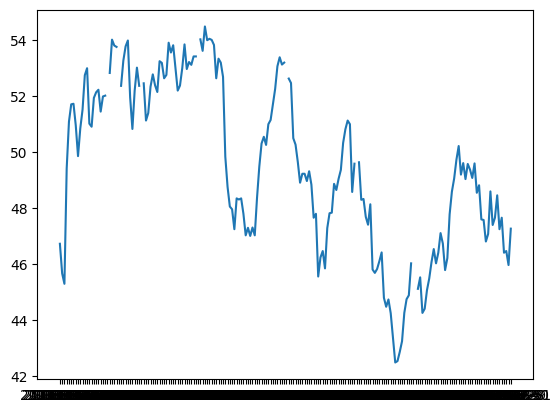

In [ ]:
plt.plot(oil['date'][-200:], oil['dcoilwtico'][-200:])

In [ ]:
for name, data in dfs.items():
    print(f'DataFrame: {name} \n {data.dtypes}')

DataFrame: train 
 id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object
DataFrame: test 
 id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object
DataFrame: holidays 
 date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
dtype: object
DataFrame: oil 
 date           object
dcoilwtico    float64
dtype: object
DataFrame: stores 
 store_nbr     int64
city         object
state        object
type         object
cluster       int64
dtype: object
DataFrame: transactions 
 date            object
store_nbr        int64
transactions     int64
dtype: object


In [ ]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil['date'] = pd.to_datetime(oil['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
total=pd.concat([train,test])
exp=pd.merge(total,oil,on='date',how='left')
exp = pd.DataFrame(exp.groupby(['date'])['dcoilwtico'].mean(), columns=['dcoilwtico'])
for i in range(len(exp)):
    if np.isnan(exp['dcoilwtico'].iloc[i]):
        for j in range(i+1, len(exp)):
            if np.isnan(exp['dcoilwtico'].iloc[j]) == False:
                exp['dcoilwtico'].iloc[i] = (exp['dcoilwtico'].iloc[i-1] + exp['dcoilwtico'].iloc[j])/2
                break
exp['date'] = pd.to_datetime(exp.index)
exp = exp.reset_index(drop=True)
exp

,dcoilwtico,date
0,70.2000,2013-01-01
1,93.1400,2013-01-02
2,92.9700,2013-01-03
3,93.1200,2013-01-04
4,93.1600,2013-01-05
...,...,...
1695,46.7125,2017-08-27
1696,46.4000,2017-08-28
1697,46.4600,2017-08-29
1698,45.9600,2017-08-30


In [ ]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dcoilwtico  1700 non-null   float64       
 1   date        1700 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.7 KB


In [ ]:
total.shape

(3029400, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder

train['day_of_week'] = train['date'].dt.dayofweek
train['day_of_month'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

label_encoder = LabelEncoder()
train['family_encoded'] = label_encoder.fit_transform(train['family'])

train

,id,date,store_nbr,family,sales,onpromotion,day_of_week,day_of_month,month,year,family_encoded
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1,1,2013,0
1,1,2013-01-01,1,BABY CARE,0.000,0,1,1,1,2013,1
2,2,2013-01-01,1,BEAUTY,0.000,0,1,1,1,2013,2
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,1,1,2013,3
4,4,2013-01-01,1,BOOKS,0.000,0,1,1,1,2013,4
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,1,15,8,2017,28
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,1,15,8,2017,29
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,1,15,8,2017,30
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,15,8,2017,31


In [ ]:
train = pd.merge(train, exp, on='date', how='left')
train

,id,date,store_nbr,family,sales,onpromotion,day_of_week,day_of_month,month,year,family_encoded,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1,1,2013,0,70.20
1,1,2013-01-01,1,BABY CARE,0.000,0,1,1,1,2013,1,70.20
2,2,2013-01-01,1,BEAUTY,0.000,0,1,1,1,2013,2,70.20
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,1,1,2013,3,70.20
4,4,2013-01-01,1,BOOKS,0.000,0,1,1,1,2013,4,70.20
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,1,15,8,2017,28,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,1,15,8,2017,29,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,1,15,8,2017,30,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,15,8,2017,31,47.57


In [ ]:
sum = 0
for store in train['store_nbr'].unique():
    store_df = train[train['store_nbr'] == store]
    sum += store_df['family'].nunique()
sum

1782

In [ ]:
data = train.drop(['id', 'date', 'family'], axis=1)
data

,store_nbr,sales,onpromotion,day_of_week,day_of_month,month,year,family_encoded,dcoilwtico
0,1,0.000,0,1,1,1,2013,0,70.20
1,1,0.000,0,1,1,1,2013,1,70.20
2,1,0.000,0,1,1,1,2013,2,70.20
3,1,0.000,0,1,1,1,2013,3,70.20
4,1,0.000,0,1,1,1,2013,4,70.20
...,...,...,...,...,...,...,...,...,...
3000883,9,438.133,0,1,15,8,2017,28,47.57
3000884,9,154.553,1,1,15,8,2017,29,47.57
3000885,9,2419.729,148,1,15,8,2017,30,47.57
3000886,9,121.000,8,1,15,8,2017,31,47.57


In [ ]:
test['day_of_week'] = test['date'].dt.dayofweek
test['day_of_month'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year

label_encoder = LabelEncoder()
test['family_encoded'] = label_encoder.fit_transform(test['family'])


test = pd.merge(test, exp, on='date', how='left')

test

,id,date,store_nbr,family,onpromotion,day_of_week,day_of_month,month,year,family_encoded,dcoilwtico
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2,16,8,2017,0,46.80
1,3000889,2017-08-16,1,BABY CARE,0,2,16,8,2017,1,46.80
2,3000890,2017-08-16,1,BEAUTY,2,2,16,8,2017,2,46.80
3,3000891,2017-08-16,1,BEVERAGES,20,2,16,8,2017,3,46.80
4,3000892,2017-08-16,1,BOOKS,0,2,16,8,2017,4,46.80
...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,3,31,8,2017,28,47.26
28508,3029396,2017-08-31,9,PREPARED FOODS,0,3,31,8,2017,29,47.26
28509,3029397,2017-08-31,9,PRODUCE,1,3,31,8,2017,30,47.26
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,3,31,8,2017,31,47.26


In [ ]:
test2 = test.drop(['id', 'date', 'family'], axis=1)
test2

,store_nbr,onpromotion,day_of_week,day_of_month,month,year,family_encoded,dcoilwtico
0,1,0,2,16,8,2017,0,46.80
1,1,0,2,16,8,2017,1,46.80
2,1,2,2,16,8,2017,2,46.80
3,1,20,2,16,8,2017,3,46.80
4,1,0,2,16,8,2017,4,46.80
...,...,...,...,...,...,...,...,...
28507,9,1,3,31,8,2017,28,47.26
28508,9,0,3,31,8,2017,29,47.26
28509,9,1,3,31,8,2017,30,47.26
28510,9,9,3,31,8,2017,31,47.26


In [ ]:
X = data.drop('sales', axis=1)[-1782*400:]
y = data['sales'][-1782*400:]

In [ ]:
X_train = X[:-1782*30]
y_train = y[:-1782*30]

X_test = X[-1782*30:]
y_test = y[-1782*30:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((659340, 8), (659340,), (53460, 8), (53460,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
models = [RandomForestRegressor(n_estimators=200), ExtraTreesRegressor(), BaggingRegressor(),
          GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor()]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def print_accuracy(m, features, target):
    pred = m.predict(features)
    mae = mean_absolute_error(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mape = mean_absolute_percentage_error(target, pred)
    r2 = r2_score(target, pred)
    adjusted_r2 = 1 - (1-r2)*(len(target)-1)/(len(target)-features.shape[1]-1)
    print(f'Model: {m} \n',
          f'MAE: {mae} \n',
          f'RMSE: {rmse} \n',
          f'MAPE: {mape} \n',
          f'R2 score: {r2} \n',
          f'Adjusted R2 score: {adjusted_r2} \n',)

In [ ]:
mod=RandomForestRegressor(n_estimators=200)
model = mod.fit(X_train, y_train)
print_accuracy(model, X_test, y_test)

Model: RandomForestRegressor(n_estimators=200) 
 MAE: 72.07959816971348 
 RMSE: 259.37688019301834 
 MAPE: 419369521889552.6 
 R2 score: 0.9577853454126911 
 Adjusted R2 score: 0.9577790271541609 



In [ ]:
mod2=GradientBoostingRegressor()
model = mod.fit(X_train, y_train)
print_accuracy(model, X_test, y_test)

Model: RandomForestRegressor(n_estimators=200) 
 MAE: 72.26389968631304 
 RMSE: 260.0750818944423 
 MAPE: 418699847744329.9 
 R2 score: 0.9575577691246202 
 Adjusted R2 score: 0.9575514168047945 

